<a href="https://colab.research.google.com/github/thakurakanksha288/learning_ml/blob/main/learning_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [4]:
cols=["flength","fwidth","fsize","Fconc","fconc1","fasym","fm3long","fm3trans","falpa","fdist","class"]
df=pd.read_csv('/content/magic04.data',names=cols)
df.head()

,flength,fwidth,fsize,Fconc,fconc1,fasym,fm3long,fm3trans,falpa,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df['class']=(df['class']=='g').astype(int)

In [6]:
df.head()

,flength,fwidth,fsize,Fconc,fconc1,fasym,fm3long,fm3trans,falpa,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


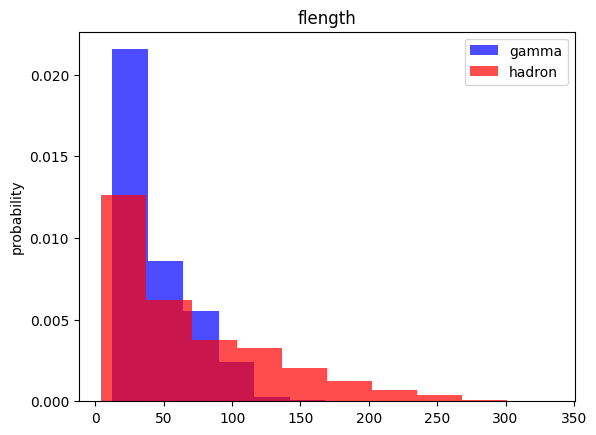

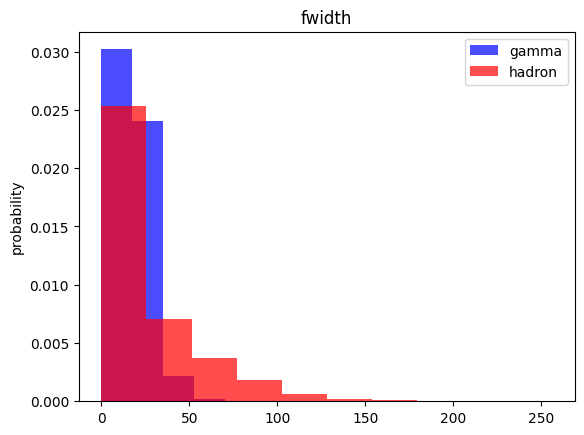

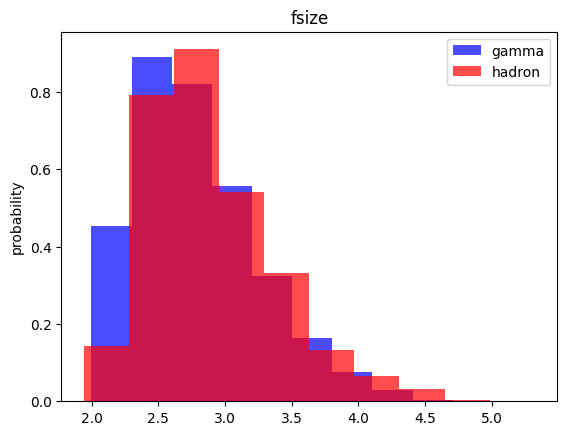

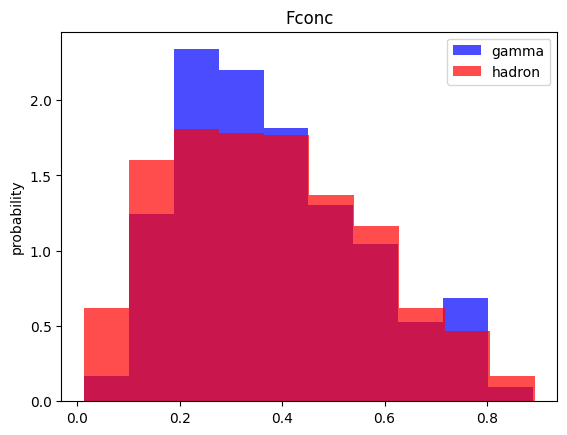

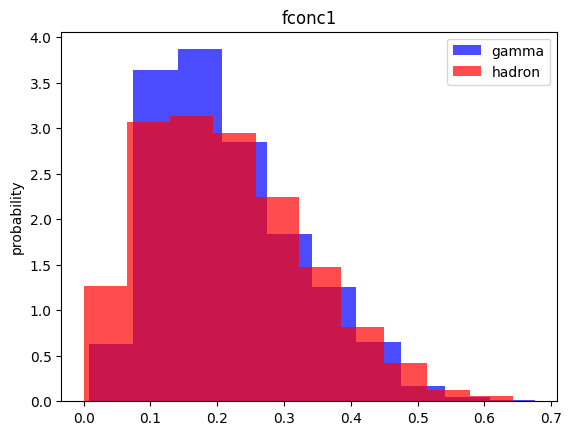

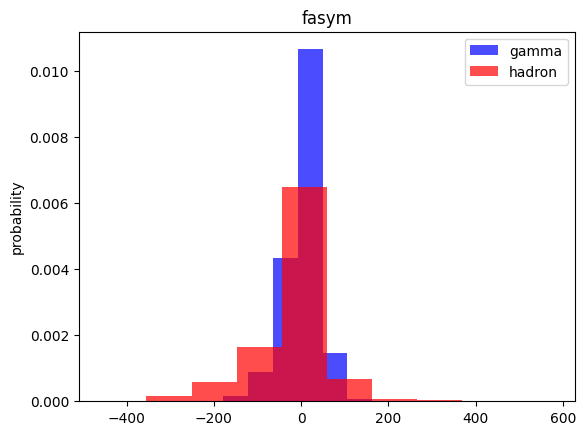

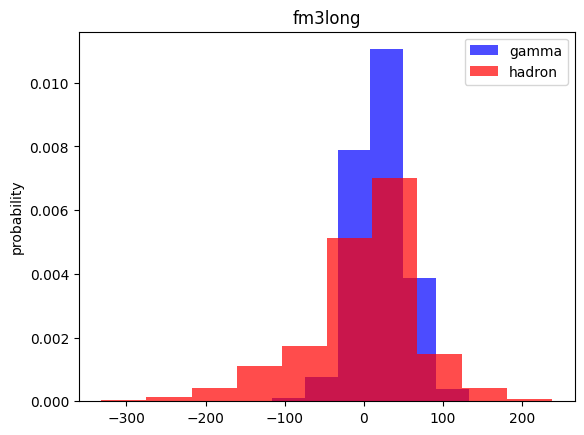

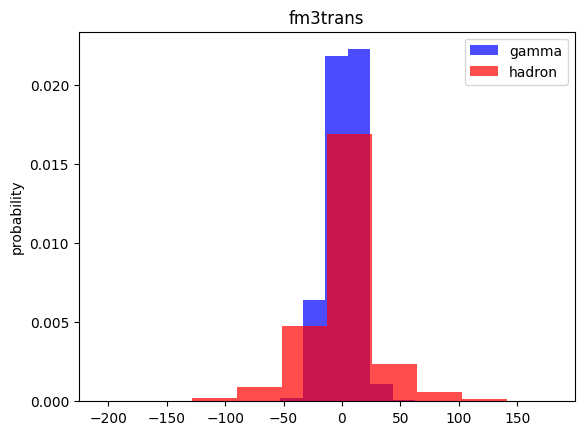

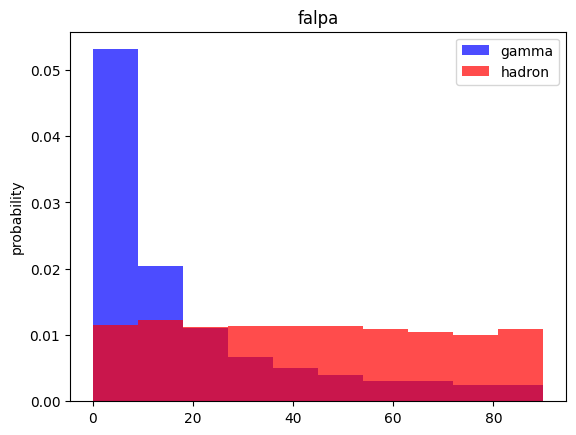

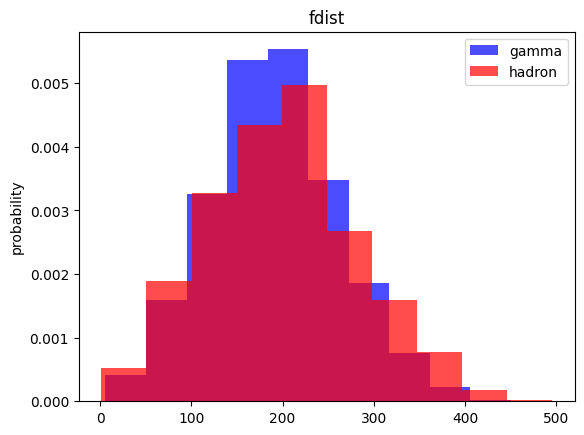

In [7]:
import matplotlib.pyplot as plt

for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.legend()
  plt.show()

In [8]:
#train,validation and test dataset
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])



/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
#scaling of the data
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.cols[:-1]].values # Use integer slicing for NumPy array
  y = dataframe[dataframe.cols[-1]] # Use integer slicing for NumPy array

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)#makes more of the less class(increase the size pf the data class)
  #this means take x and add the standed scalar to x and transform alll the values
  data=np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y

In [10]:
import numpy as np
cols=["flength","fwidth","fsize","Fconc","fconc1","fasym","fm3long","fm3trans","falpa","fdist","class"]

# Split the dataframe into train, valid, and test sets
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

# Re-defining scale_dataset to correctly handle DataFrame input
def scale_dataset(dataframe,oversample=False):
  # Extract features and target using column names from 'cols'
  X = dataframe[cols[:-1]].values
  y = dataframe[cols[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
  data=np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y

# The 'columns' variable is no longer directly used for indexing within scale_dataset but can remain for context.
columns = cols
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


In [11]:
#kkmeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_predict=knn_model.predict(X_test)
y_predict
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [13]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1357
           1       0.86      0.85      0.86      2447

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [14]:
#navie baesd
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [15]:
y_predict=knn_model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1357
           1       0.86      0.85      0.86      2447

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



In [17]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [18]:
y_predict=lg_model.predict(X_test)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1357
           1       0.85      0.83      0.84      2447

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [20]:
#svm model
from sklearn.svm import SVC

In [22]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [24]:
y_predict=svm_model.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1357
           1       0.89      0.91      0.90      2447

    accuracy                           0.86      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [53]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('binary_crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.grid(True)
  plt.show()

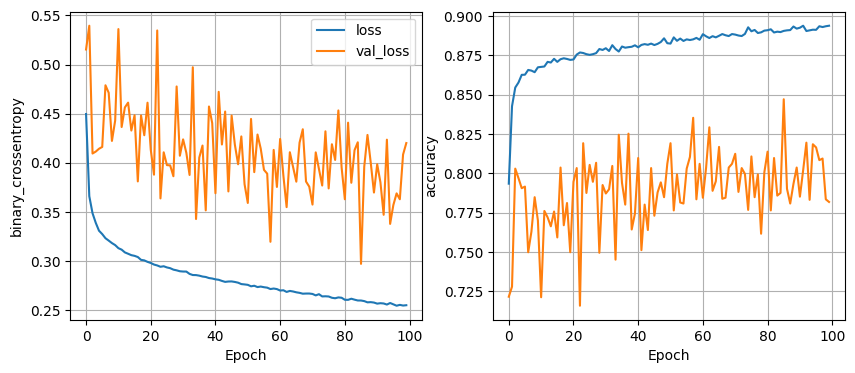

In [56]:
plot_history(history)

In [54]:
#neural network
import tensorflow as tf
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,epochs,batch_size,shuffle):

    nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
    history=nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0)
    return nn_model,history

16 nodes,dropout0,lr0.01,batch size: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


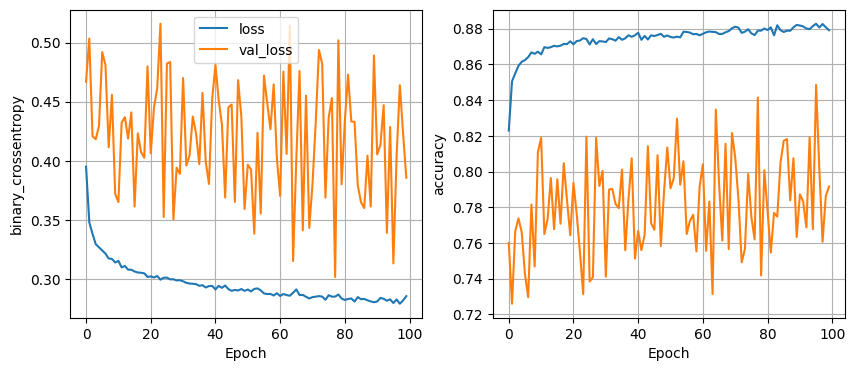

16 nodes,dropout0,lr0.01,batch size: 64


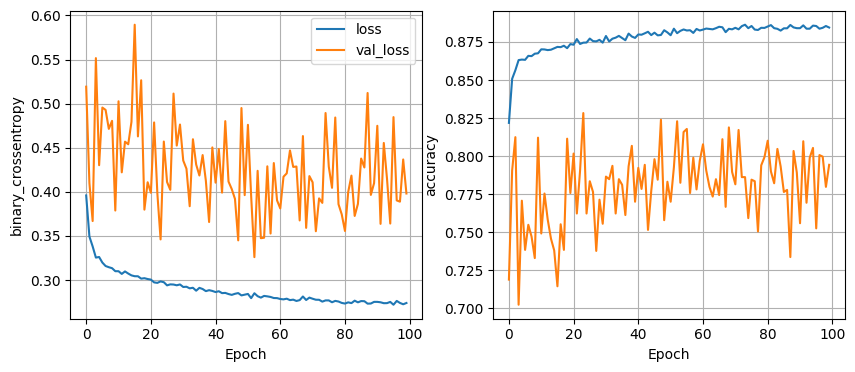

16 nodes,dropout0,lr0.01,batch size: 128


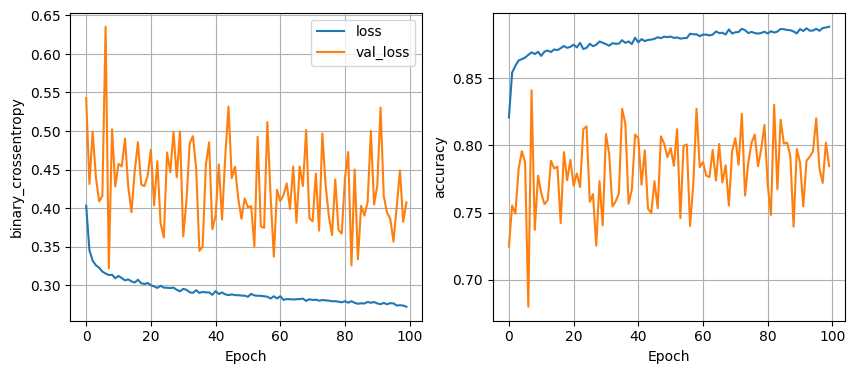

16 nodes,dropout0,lr0.005,batch size: 32


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes,dropout{dropout_prob},lr{lr},batch size: {batch_size}")
        model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,epochs,batch_size,shuffle=True)
        plot_history(history)
        val_loss, val_accuracy = model.evaluate(X_valid,y_valid, verbose=0)
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [ ]:
least_loss_model.evaluate(X_test)

In [ ]:
y_predict=least_loss_model.predict(X_test)
y_predict=(y_predict>0.5).astype(int)
y_predict

In [ ]:
print(classification_report(y_test,y_predict))